# Multilayer Perceptron

---


### Utilizando dataset Iris:
https://archive.ics.uci.edu/dataset/53/iris

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 434ms/step - accuracy: 0.3396 - loss: 1.1667 - val_accuracy: 0.4000 - val_loss: 1.0849
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.3323 - loss: 1.1371 - val_accuracy: 0.3667 - val_loss: 1.0538
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.3565 - loss: 1.0859 - val_accuracy: 0.3667 - val_loss: 1.0240
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.3117 - loss: 1.0753 - val_accuracy: 0.3667 - val_loss: 0.9962
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3190 - loss: 1.0560 - val_accuracy: 0.3667 - val_loss: 0.9690
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.3390 - loss: 1.0131 - val_accuracy: 0.3667 - val_loss: 0.9446
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3342 - loss: 0.9881 - val_accuracy: 0.3667 - val_loss: 0.9252
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.3740 - loss: 0.9657 - val_accuracy: 0.3667 - val_loss: 0

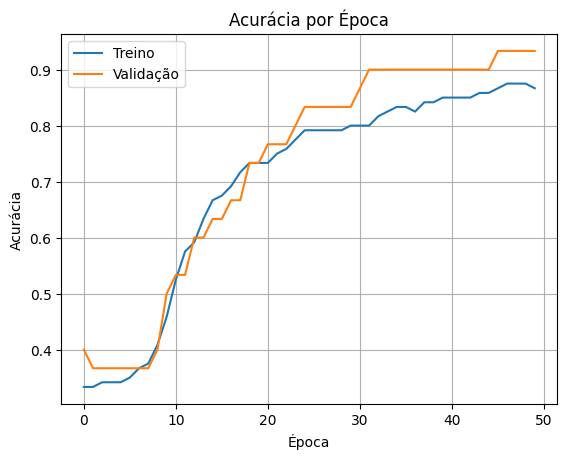

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Atributos: comprimento/largura de pétalas e sépalas
y = iris.target  # Classes: 0, 1, 2 (setosa, versicolor, virginica)

# Normalização dos dados (muito importante para redes neurais!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separar os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar o modelo com camadas densas (fully connected)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),  # 4 entradas -> 10 neurônios
    tf.keras.layers.Dense(8, activation='relu'),  # camada escondida
    tf.keras.layers.Dense(3, activation='softmax')  # 3 classes -> saída softmax
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAcurácia no conjunto de teste: {accuracy:.2f}")

# Visualizar o histórico de treinamento
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia por Época')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Criar uma planilha Excel
with pd.ExcelWriter("pesos_do_modelo.xlsx") as writer:
    for i, layer in enumerate(model.layers):
        weights, biases = layer.get_weights()  # pesos e bias da camada
        df_weights = pd.DataFrame(weights)
        df_biases = pd.DataFrame(biases.reshape(1, -1))  # reshape para 1 linha

        # Salvar pesos
        df_weights.to_excel(writer, sheet_name=f"Layer_{i+1}_Pesos", index=False)
        # Salvar bias
        df_biases.to_excel(writer, sheet_name=f"Layer_{i+1}_Bias", index=False)

print("✅ Arquivo 'pesos_do_modelo.xlsx' criado com sucesso!")

✅ Arquivo 'pesos_do_modelo.xlsx' criado com sucesso!


In [ ]:
import pandas as pd

# Converter os dados de entrada e rótulos em DataFrame
df_X_train = pd.DataFrame(X_train, columns=iris.feature_names)
df_y_train = pd.DataFrame(y_train, columns=["target"])

# Concatenar os dados e o rótulo na mesma tabela
df_treino = pd.concat([df_X_train, df_y_train], axis=1)

# Salvar em Excel
df_treino.to_excel("dados_treino.xlsx", index=False)

# Fazer download no Colab
from google.colab import files
files.download("dados_treino.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import tensorflow as tf

# Escolher o índice da amostra para testar (ex: a primeira amostra do treino)
indice = 1

# Exibir os dados de entrada e o rótulo real
entrada = X_train[indice]
rotulo_real = y_train[indice]

# Criar DataFrame com os dados formatados
df_entrada = pd.DataFrame([entrada], columns=iris.feature_names)
df_entrada["target"] = rotulo_real
print("📥 Dados de entrada usados na inferência:")
display(df_entrada)

# Fazer inferência (predição)
entrada_reshape = entrada.reshape(1, -1)  # Ajustar para o formato (1, n_features)
saida_softmax = model.predict(entrada_reshape)
classe_prevista = tf.argmax(saida_softmax, axis=1).numpy()[0]

# Mostrar resultado da inferência
print("\n🔍 Saída da softmax:", saida_softmax)
print("✅ Classe prevista:", classe_prevista)
print("🎯 Classe real:    ", rotulo_real)

📥 Dados de entrada usados na inferência:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.173674,3.090775,-1.283389,-1.05218,0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

🔍 Saída da softmax: [[0.38782728 0.33831888 0.27385384]]
✅ Classe prevista: 0
🎯 Classe real:     0
